In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Tabea_clean.csv")

In [5]:
df

,MoA,Input,PCR cycles,Tagmentation,Input Read no.,Uniquely mapped reads,Reads/Well,Uniquely mapped %,After De-duplication (unique reads left),Reads per sample OUTPUT
0,MoA980-Q5-Illumina,10,8,Illumina DNA Prep,767299,469023,7.992698e+03,0.611,0.9130,4.458671e+03
1,MoA980-Q5-Illumina,25,8,Illumina DNA Prep,1154055,802752,1.202141e+04,0.696,0.9270,7.756115e+03
2,MoA980-Q5-Illumina,50,8,Illumina DNA Prep,2406084,1747871,2.506338e+04,0.726,0.9290,1.690409e+04
3,MoA980-Q5-Illumina,25,10,Illumina DNA Prep,3814764,2553181,3.973712e+04,0.669,0.8280,2.201167e+04
4,MoA980-Q5-Illumina,50,10,Illumina DNA Prep,7223301,4928408,7.524272e+04,0.682,0.8450,4.336163e+04
5,MoA980-Q5-Illumina,10,12,Illumina DNA Prep,6750783,3877789,7.032066e+04,0.574,0.6400,2.583300e+04
6,MoA980-Q5-Illumina,25,12,Illumina DNA Prep,10391734,5803133,1.082472e+05,0.558,0.6930,4.185855e+04
7,MoA980-Q5-Illumina,50,12,Illumina DNA Prep,15836757,9439316,1.649662e+05,0.596,0.7330,7.206846e+04
8,MoA980-Q5-Selfloaded,10,8,Selfloaded,4618166,3710918,4.810590e+04,0.804,0.7910,3.059362e+04
9,MoA980-Q5-Selfloaded,25,8,Selfloaded,6493238,5168051,6.763790e+04,0.796,0.8000,4.307181e+04


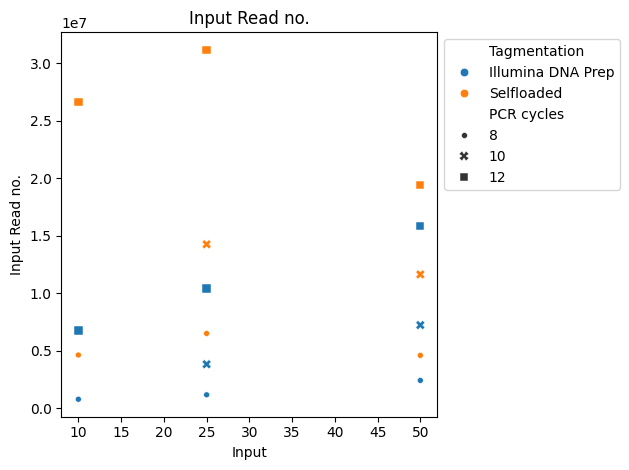

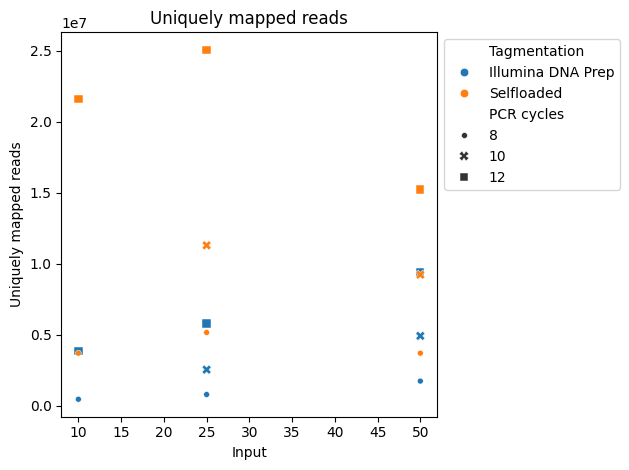

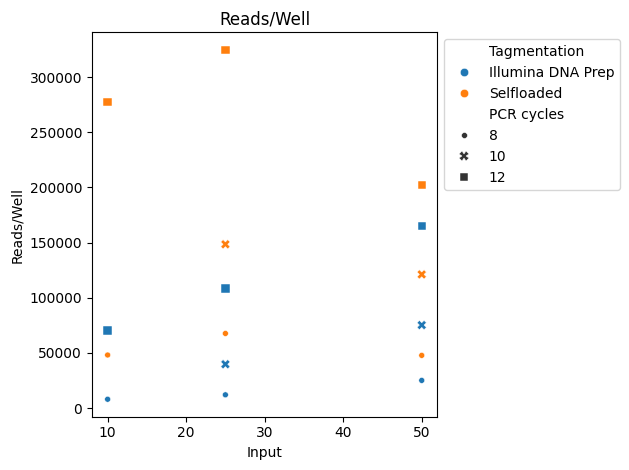

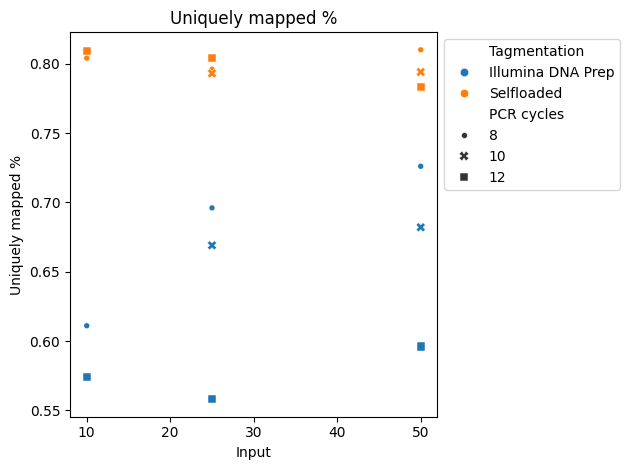

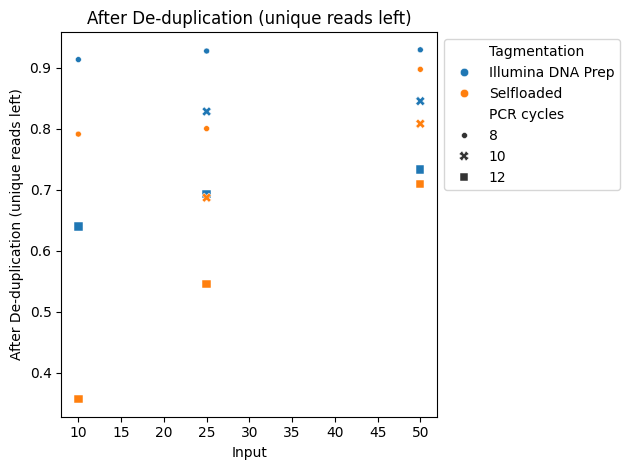

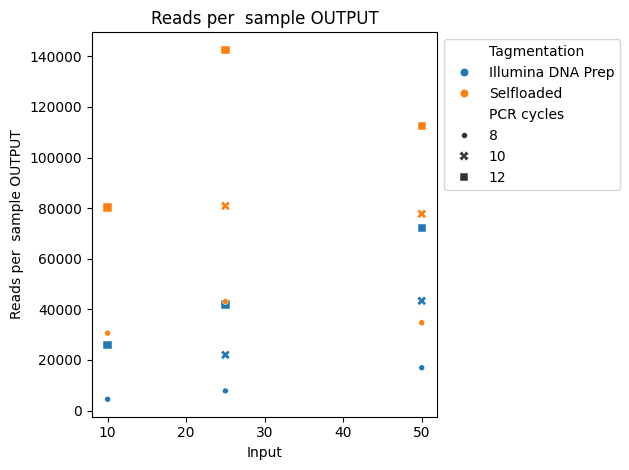

In [16]:
df = df[df["Tagmentation"].isin(["Illumina DNA Prep", "Selfloaded"])]
import matplotlib.backends.backend_pdf

# Create a PDF file to save the plots
with matplotlib.backends.backend_pdf.PdfPages("plots4tabea.pdf") as pdf:
    for trait in df.columns[4:]:
        plt.figure()  # Create a new figure for each plot
        sns.scatterplot(
            data=df,
            x="Input",
            y=trait,
            style="PCR cycles",
            size="PCR cycles",
            hue="Tagmentation",
        )
        ax = plt.gca()
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        plt.title(trait)
        plt.tight_layout()
        pdf.savefig()  # Save the current figure to the PDF
        plt.show()
        plt.close()  # Close the current figure

# After the loop, the PDF will be closed automatically